In [17]:
import pandas as pd
import numpy as np
import time
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.stats import entropy as scipy_entropy
from scipy.optimize import linear_sum_assignment as linear_assignment
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import entropy
from collections import Counter
from sklearn.metrics import accuracy_score

In [18]:
# 讀取 banana.csv 數據集
banana_df = pd.read_csv('D:\\TEST3\\banana.csv')

In [19]:
# Extract features and labels
X_banana = banana_df.drop('class', axis=1)
y_banana = banana_df['class']

In [20]:
# 2. 資料前處理 (這裡只進行標準化)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_banana)

In [21]:
# 開始計時
start_time = time.time()

In [22]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
# 執行 DBSCAN 群聚
dbscan_labels = dbscan.fit_predict(banana_df[['x', 'y']])

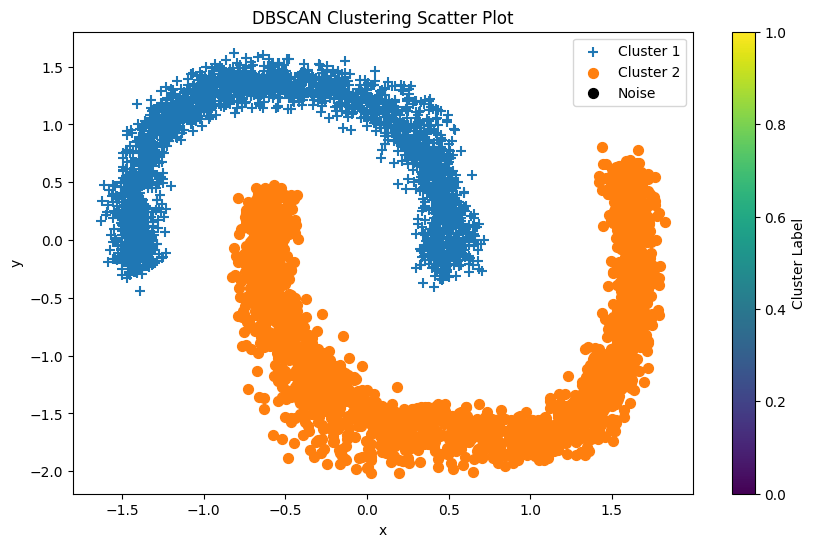

In [23]:
#散點圖 (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[dbscan_labels == 0, 0], X_scaled[dbscan_labels == 0, 1], s=50, marker='+', label='Cluster 1')
plt.scatter(X_scaled[dbscan_labels == 1, 0], X_scaled[dbscan_labels == 1, 1], s=50, marker='o', label='Cluster 2')
plt.scatter(X_scaled[dbscan_labels == -1, 0], X_scaled[dbscan_labels == -1, 1], s=50, color='black', label='Noise')
plt.title('DBSCAN Clustering Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

C:\Users\brain\AppData\Local\Temp\ipykernel_28476\3021824422.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=banana_df, x='x', y='y', cmap='viridis', shade=True, bw_adjust=0.5)


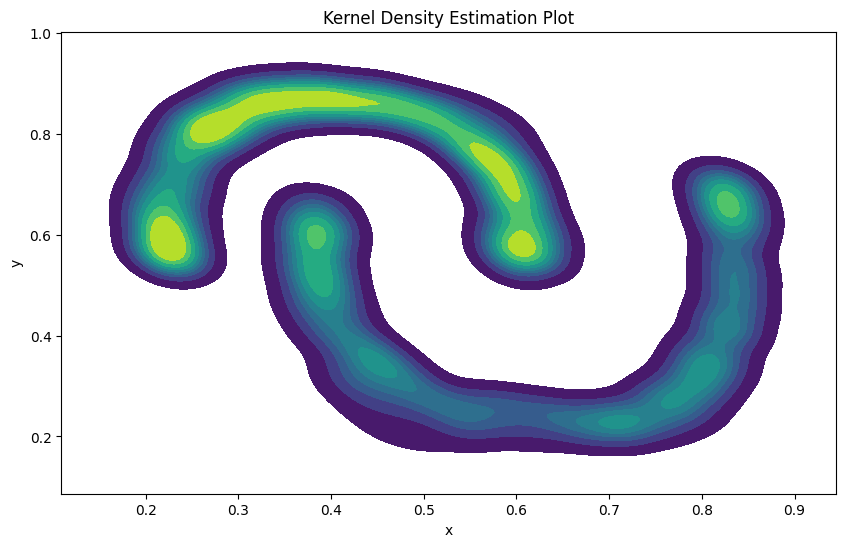

In [24]:
#核密度估計圖 (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=banana_df, x='x', y='y', cmap='viridis', shade=True, bw_adjust=0.5)
plt.title('Kernel Density Estimation Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

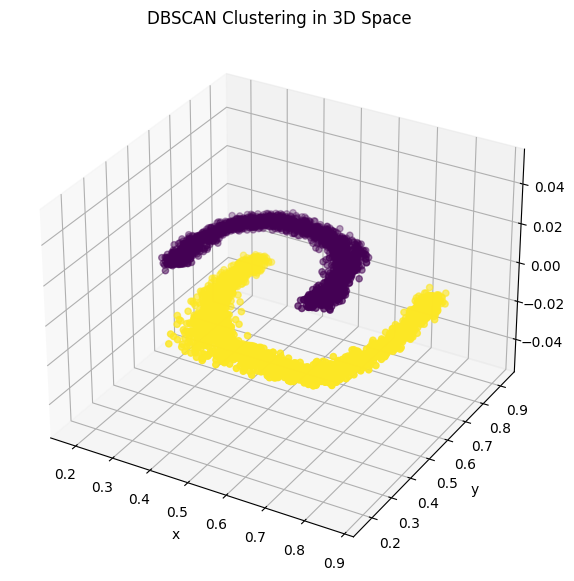

In [25]:
#三維空間中的群聚圖
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(banana_df['x'], banana_df['y'], c=dbscan_labels, cmap='viridis', marker='o')
ax.set_title('DBSCAN Clustering in 3D Space')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

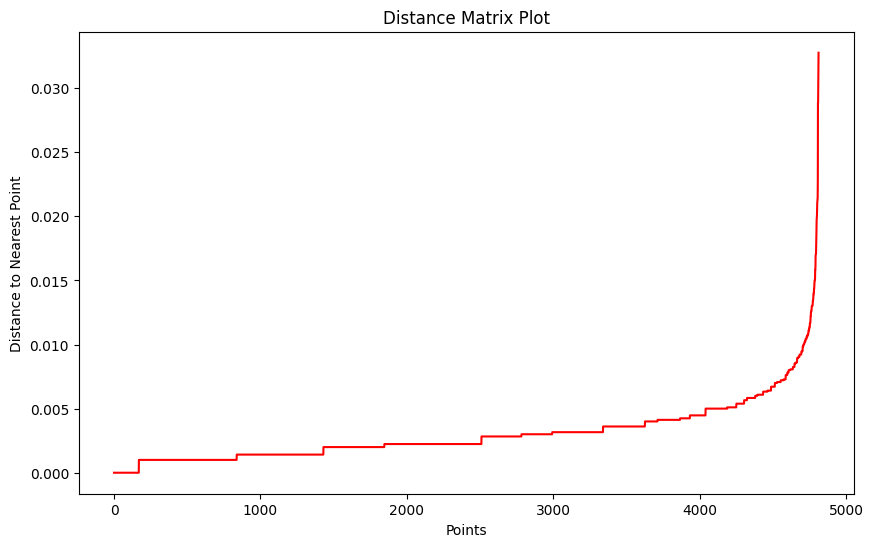

In [26]:
#距離矩陣圖 (Distance Matrix Plot)
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(banana_df[['x', 'y']])
distances, indices = neighbors_fit.kneighbors(banana_df[['x', 'y']])

plt.figure(figsize=(10, 6))
plt.plot(np.sort(distances[:, 1]), color='red')
plt.title('Distance Matrix Plot')
plt.xlabel('Points')
plt.ylabel('Distance to Nearest Point')
plt.show()

In [27]:
# 計算 Accuracy
def calculate_accuracy(true_labels, predicted_labels):
    D = max(predicted_labels.max(), true_labels.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(predicted_labels.size):
        w[predicted_labels[i], true_labels[i]] += 1
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in zip(*ind)]) / predicted_labels.size

accuracy = calculate_accuracy(banana_df['class'], dbscan_labels)

In [28]:
# 計算熵
cluster_entropy = [scipy_entropy(banana_df[dbscan_labels == i]['class'].value_counts(normalize=True)) 
                   for i in range(-1, np.max(dbscan_labels)+1)]
mean_entropy = np.mean(cluster_entropy)

In [29]:
# 計算每個群組的中心
cluster_centers = banana_df[dbscan_labels != -1].groupby(dbscan_labels[dbscan_labels != -1]).mean()

# 初始化 SSE
sse = 0

# 計算每個群組內的點到中心的距離平方和
for label in np.unique(dbscan_labels):
    if label != -1:  # 排除噪聲點
        cluster_points = banana_df[dbscan_labels == label]
        center = cluster_centers.loc[label]
        sse += ((cluster_points - center) ** 2).sum().sum()  # 距離平方和

In [30]:
# 計算 ARI (Adjusted Rand Index)
ari = adjusted_rand_score(banana_df['class'], dbscan_labels)

In [31]:
# 停止計時
end_time = time.time()

# 計算所花費的時間
dbscan_elapsed_time = end_time - start_time

In [32]:
print("Elapsed Time: {:.2f} seconds".format(dbscan_elapsed_time))
print("Accuracy: ", accuracy)
print("Mean Entropy: ", mean_entropy)
print("SSE: ", sse)
print("ari: ", ari)

Elapsed Time: 5.31 seconds
Accuracy:  1.0
Mean Entropy:  0.0
SSE:  227.11916590178612
ari:  1.0
